This notebook shows how to trim and remove black areas in images. This is helpful to reduce size of the image while keeping useful image information that can be used in CNN.

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import cv2


In [16]:
def img2roi(img):
#     img = img.squeeze()
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Binarize the image
    bin_img = cv2.threshold(img, 20, 255, cv2.THRESH_BINARY)[1]

    # Make contours around the binarized image, keep only the largest contour
    contours, _ = cv2.findContours(bin_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    contour = max(contours, key=cv2.contourArea)

    # Find ROI from largest contour
    ys = contour.squeeze()[:, 0]
    xs = contour.squeeze()[:, 1]
    roi =  img[np.min(xs):np.max(xs), np.min(ys):np.max(ys)]
    
    roi = cv2.resize(roi, (img.shape[1], img.shape[0]))
    roi = cv2.cvtColor(roi,cv2.COLOR_GRAY2RGB)
#     roi = np.expand_dims(roi, axis =-1)
    return roi


In [17]:
os.listdir(os.getcwd())

['image-orig.jpeg', 'trim-images.ipynb', '.ipynb_checkpoints']

(1924, 1600, 3)


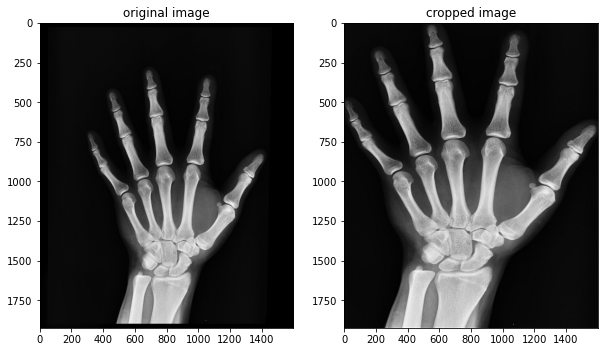

In [18]:
img = cv2.imread(os.getcwd() + '/image-orig.jpeg')

print(img.shape)
fig = plt.gcf()
fig.set_size_inches(10, 10)
# original image
plt.subplot(1,2,1)
imgplot = plt.imshow(img)
plt.title('original image')

plt.subplot(1,2,2)
imgplot = plt.imshow(img2roi(img))
plt.title('cropped image')
plt.show()